# Portfolio Optimization
Modern portfolio theory is also known as mean-variance optimization.

One fundamental assumption is that returns are **normally distributed**.

We will focus on:
* Normality test: Mean Variance Portfolio Theory (MPT) and Capital Asset Pricing Model (CAPM)
* Portfolio optimization
* Bayesian statistics
* Machine learning

***Portfolio theory***

Stock returns are assumed to be normally distributed. Investment decissions are then based on expected mean return as well as variance of returns. 

***CAPM***

Again, when stock returns are normally distributed, prices of single stockscan be elegantly expressed in linear relationship to a broad market index;the relationship is generally expressed by a measure for the co-movement of a single stock with the market called beta or $\beta$.

***Efficient Markets Hypothesis***

An efficient market is a market where prices reflect all available information, where 'all' can be defined more narrowly or more widely (e.g. as in 'all publicly available information vs including also only privately available information'). If this hypothesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

***Option Pricing Theory**

Brownian motion is the benchmark model for the modeling of random pricemovements of financial instruments; the famous Black-Scholes-Mertonoption pricing formula uses a geometric Brownian motion as the model fora stock’s random price fluctuations over time, leading to log-normallydistributed prices and normally distributed returns.


The Geometric Brownian Motion is a stochastic process used in financial modelling.

Log returns are normally distributed:
$\log \frac{S_t}{S_s} = -\log S_t - \log S_s$ where $0 < s < t$

## Simulated data

In [10]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import pandas as pd
import os
import warnings
np.random.seed(100)

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
# Lets create a function to generate 
## a Monte Carlo simulated geometric Brownian Motion
def gen_paths(s0, r, sigma, T, M, I):
    """
    Parameters
    ----------
    s0: (float) initial stock/index value
    r: (float) constant short rate
    sigma: (float) constant volatility
    T: (float) final time horizon
    M: (int) number of time steps/intervals
    I: (int) number of paths to be simulated
    
    Returns
    -------
    paths: ndarray, shape (M + 1, I) simulated paths
    """
    
    dt = T/M
    paths = np.zeros((M + 1, I))
    paths[0] = s0
    for t in range(1, M + 1):
        result = np.random.standard_normal(I)
        result = (result - result.mean())/result.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * result)
    return paths
    

105.12710963760242
105.12645392478755


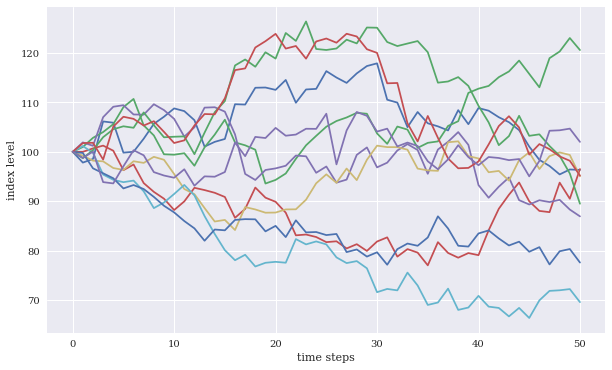

In [3]:
s0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)
paths = gen_paths(s0, r, sigma, T, M, I)
init_s = s0 * math.exp(r * T)
last_s = paths[-1].mean()
print(init_s)
print(last_s)

plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

In [4]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [5]:
log_returns = np.log(paths[1:]/paths[:-1])
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [6]:
def print_statistics(array):
    sta = scs.describe(array)
    print('{:14s} {:15s}'.format('statistic', 'value'))
    print(30 * '-')
    print('{:14s} {:15.5f}'.format('size', sta[0]))
    print('{:14s} {:15.5f}'.format('min', np.min(sta[1][0])))
    print('{:14s} {:15.5f}'.format('max', np.max(sta[1][1])))
    print('{:14s} {:15.5f}'.format('mean', np.mean(sta[2])))
    print('{:14s} {:15.5f}'.format('std', np.sqrt(sta[3])))
    print('{:14s} {:15.5f}'.format('skew', sta[4]))
    print('{:14s} {:15.5f}'.format('kurtosis', sta[5]))
    

In [7]:
#print_statistics(log_returns)

# Visual test of normality

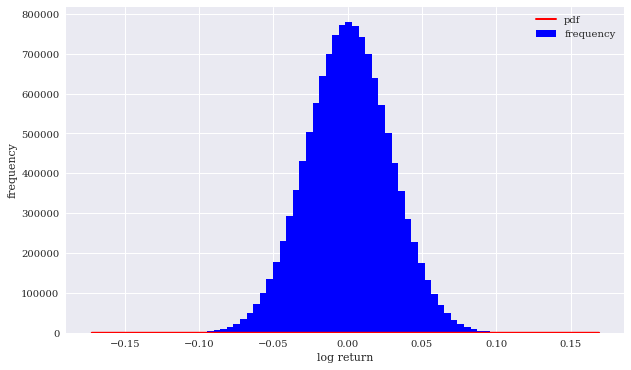

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, 
#          normed=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, 
                         scale=sigma/np.sqrt(M)), 'r', 
         lw=2.0, label='pdf')
plt.legend();

# Test by quantile quantile graph

In [9]:
plt.figure(figsize=(10, 6))
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

NameError: name 'sm' is not defined

<Figure size 720x432 with 0 Axes>

## Other tests
* skewness: value near 0
* kurtosis test: value near 0

In [ ]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.         
    Parameters            
    ==========             
    array: ndarray                 
    object to generate statistics on             
    '''
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurtosis of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurtosis test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [ ]:
# if p-value > 0.5 then normal distributed

normality_tests(log_returns.flatten()) 

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1],bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]),bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log-data');


In [ ]:
normality_tests(np.log(paths[-1]))

In [ ]:
plt.figure(figsize=(10,6))
log_data=np.log(paths[-1])
plt.hist(log_data,bins=70,normed=True,label='observed',color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x=np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,scs.norm.pdf(
    x,log_data.mean(),log_data.std()),'r',lw=2.0, label='pdf')
plt.legend();

In [ ]:
def qqplot(log_data):
    sm.qqplot(log_data, line='s')
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles');

In [ ]:
qqplot(log_data)

## Real Data

In [ ]:
data = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'closing_prices.csv'))
data.set_index('date', inplace=True)


In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data = data[['AAPL', 'AMZN', 'GOOG', 'NVDA', 'MSFT']]
data.head()

In [ ]:
data.iloc[0:2]

In [ ]:
data.ix[0]

In [ ]:
(data/data.iloc[0] * 100).plot(figsize=(10, 6));

In [ ]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

In [ ]:
log_returns.hist(bins=50, figsize=(10, 8));

In [ ]:
for sym in data.columns:
    print('\nResults for symbol {}'.format(sym))
    print(30*'-')
    log_data=np.array(log_returns[sym].dropna())
    normality_tests(log_data)

In [ ]:
qqplot(log_returns['AAPL'].dropna())

In [ ]:
qqplot(log_returns['GOOG'].dropna())

# Portfolio Optimization
The portfolio weights sum to one:

$\sum_{i = 1}^{n}w_i = 1$ 

In [ ]:
noa = data.shape[1]
rets = np.log(data/data.shift(1))
rets.hist(bins=40, figsize=(10, 8));


In [ ]:
rets.mean() * 252 # annualized returns

In [ ]:
rets.cov() * 252 # annualized covariance matrix

## weights

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)
print('weights:', weights)
print()
print('weights sum:', weights.sum())

Formula for expected return of a portfolio:

$\mu_p = E\big(\sum_I w_i r_i \big) = \sum_I w_i \mu_i$

use linearity of expectation operator.

Expected portfolio variance is given by:

the covariance is

$\sigma_{ij} = E(r_i - \mu_i)(r_j - \mu_j)$

from this we get the variance

$\sigma ^2 = E((r_i - \mu_i)^2) = \sum_{i\in{I}}\sum_{j\in{I}}w_iw_j\sigma_{ij} = w^T\Sigma w$

In [ ]:
np.sum(rets.mean() * weights) * 252

## variance

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # variance

In [ ]:
math.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights))) # volatility

In [ ]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [ ]:
prets=[]
pvols=[]
for p in range(2500):
    weights = np.random.random(noa)
    weights/=np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))


In [ ]:
prets = np.array(prets)
pvols = np.array(pvols)

Sharpe Ratio:

$SR = \frac{\mu_p - r_f}{\sigma_p}$



In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(pvols,prets,c=prets/pvols,marker='o',cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Optimal portfolios
The optimal portfolio is found by minimizing with respect to the negative of the Sharpe Ratio. The weights are constrained to be between 0 and 1 and add up to 1.

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)

In [ ]:
cons = ({'type':'eq','fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1./noa])
eweights

In [ ]:
min_func_sharpe(eweights)

In [ ]:
%%time
opts=sco.minimize(min_func_sharpe,
                  eweights,method='SLSQP',
                  bounds=bnds,
                  constraints=cons)

In [ ]:
opts

In [ ]:
opts['x'].round(3)

In [ ]:
port_ret(opts['x']).round(3)


In [ ]:
port_vol(opts['x']).round(3)

In [ ]:
port_ret(opts['x'])/port_vol(opts['x']) # sharpe ratio

## minimization of volatility

In [ ]:
optv = sco.minimize(port_vol,eweights,
                    method='SLSQP',
                    bounds=bnds,
                    constraints=cons)
optv

In [ ]:
np.mean(np.array([0.18576914, 0.18558958, 0.18524021, 0.18638385, 0.18620184])).round(3)

In [ ]:
optv['x'].round(3)

In [ ]:
port_vol(optv['x']).round(3)

In [ ]:
port_ret(optv['x']).round(4)

In [ ]:
(port_ret(optv['x'])/port_vol(optv['x'])).round(3)

In [ ]:
port_ret(optv['x'])/port_vol(optv['x'])

## Efficient frontier
Fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. Because when iterating over different target return levels one condition for the minimization changes. That is why we update the dictionary of constraints.

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
%%time 
trets = np.linspace(0.175, 0.3, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol,
                       eweights,
                       method='SLSQP',
                       bounds=bnds,
                       constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(pvols,
            prets, c=prets/pvols, marker='.',
            alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
